# My question is whether the distribution of the normal stats (Atk, Def) differs from that of the special stats (SpAtk, SpDef).
# I think an observational study is best fit to this, because we won't have to change any variables to figure out the answer.
# I will examine a sample of Pokemon from generations 1-6 using the Pokemon dataset hosted by Armand Gilles on GitHub.
# The link to that dataset is here: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6
# The dataset does not contain information on how it was collected, but I can guess how they got the data.
# Since all of the data included is available within the Pokemon games it describes, I believe it was collected from the games directly.
# Since it covers generations 1-6, I believe that would be all games before the release of Pokemon Sun and Moon.

# Biases:
# This only includes generations 1-6, so data from other generations is missing.
# Mega versions of Pokemon are counted as additional Pokemon, with their stats counted additional times.

Q1 (25th percentile): 50.0
Q3 (75th percentile): 80.0


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


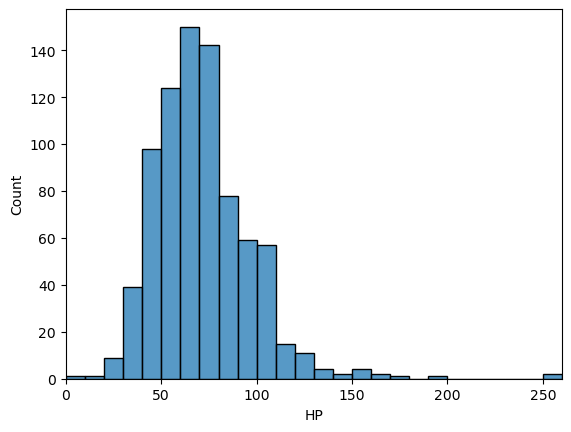

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemon_df = pd.read_csv("pokemon.csv")

q1 = pokemon_df["HP"].quantile(0.25)
q3 = pokemon_df["HP"].quantile(0.75)
print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)

sns.histplot(data=pokemon_df, x="HP", binrange=(0,260), bins=26)
plt.xlim(0,260)
plt.show()